# Wizualizacja danych w `matplotlib` i `seaborn`

## Wykres liniowy

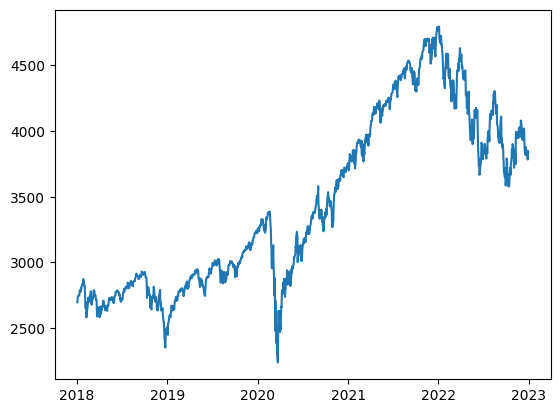

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("SP500.csv", parse_dates=True, index_col="Date")

plt.plot(df.index, df.Close); # Wskazówka: jeśli jedną z osi są daty, warto zapewnić typ danych datetime

## Dodawanie wielu wykresów, tytułów, legendy

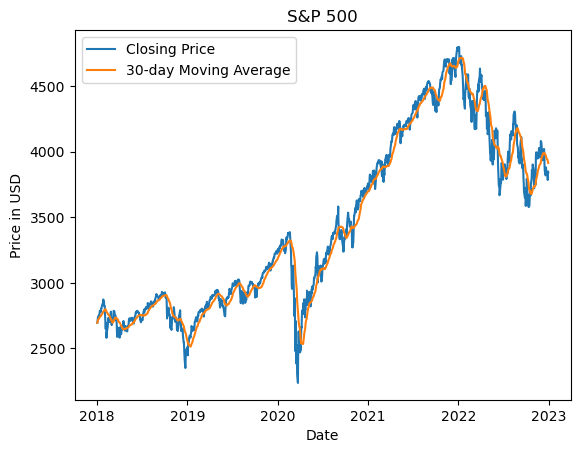

In [4]:
plt.plot(df.index, df.Close, label="Closing Price")
plt.plot(df.index, df.Close.rolling('30D').mean(), label="30-day Moving Average")

plt.title("S&P 500")
plt.xlabel("Date")
plt.ylabel("Price in USD")
plt.legend();

## Histogram

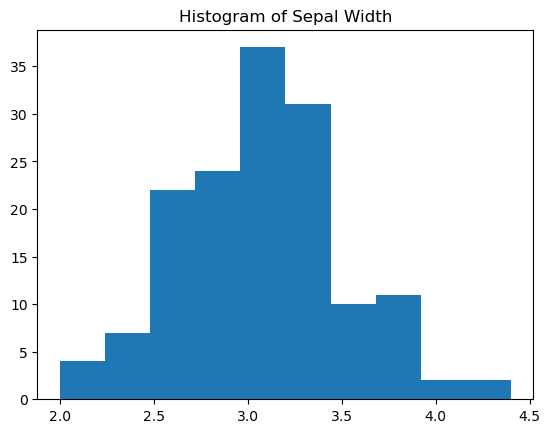

In [6]:
iris = pd.read_csv("iris.csv")

plt.hist(iris.sepal_width, bins=10)
plt.title("Histogram of Sepal Width");

## Wykres pudełkowy

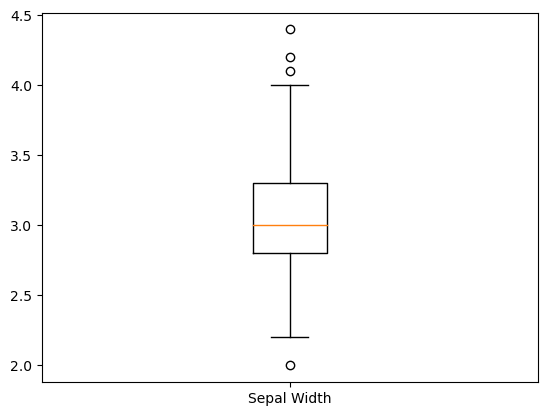

In [7]:
plt.boxplot(iris.sepal_width, labels=["Sepal Width"]);

Aby stworzyć kilka wykresów pudełkowych można podać listę zawierającą kilka wektorów z danymi numerycznymi, lub `DataFrame`. Parametr `vert` pozwala rysować wykres w pionie lub poziomie.

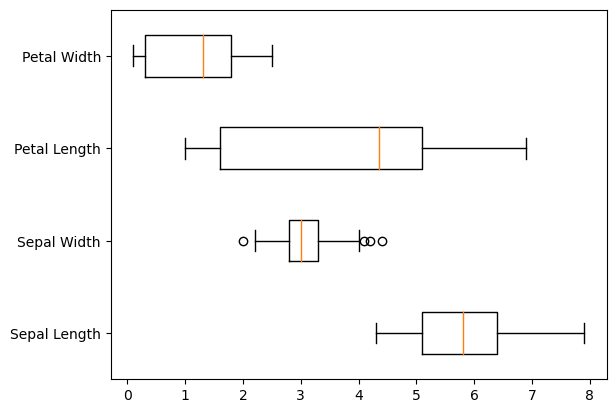

In [12]:
iris_numeric = iris.drop("variety", axis=1)
tick_labels = iris_numeric.columns.str.replace("_", " ").str.title()
plt.boxplot(iris_numeric, labels=tick_labels, vert=False);

## Wykres słupkowy
Wykres słupkowy pionowy tworzymy metodą `plt.bar()`, a poziomy `plt.barh()`. Na wykresie możemy zaznaczyć błędy pomiaru podając `yerr`, lub `xerr` - w tym przypadku zaznaczam 2SE (przybliżona szerokość 95% przedziału ufności). W poniższym przykładzie ilustruję też dodawanie napisów metodą `plt.annotate()`.

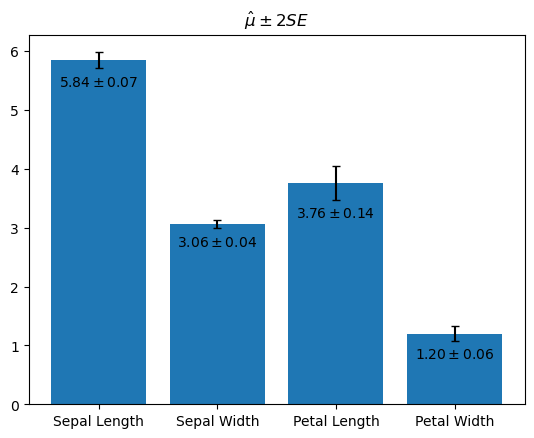

In [13]:
SE = iris_numeric.apply(lambda x: x.std()/(x.size**0.5), axis=0) # SE = sigma/sqrt(n)

plt.bar(iris_numeric.columns, iris_numeric.mean(), yerr=2*SE, capsize=3)

plt.title(r"$\hat{\mu} \pm 2SE$")
tick_labels = iris_numeric.columns.str.replace("_", " ").str.title()
plt.xticks(ticks=iris_numeric.columns, labels=tick_labels)

for col in iris_numeric:
    mu = iris_numeric[col].mean()
    plt.annotate(text=f"${mu:.2f} \pm {SE[col]:.2f}$", 
                 xy=(col, mu-2*SE[col]-0.3), 
                 horizontalalignment='center')

In [53]:
SE

sepal_length    0.067611
sepal_width     0.035588
petal_length    0.144136
petal_width     0.062236
dtype: float64

## Wykres punktowy

Text(0, 0.5, 'Petal Width')

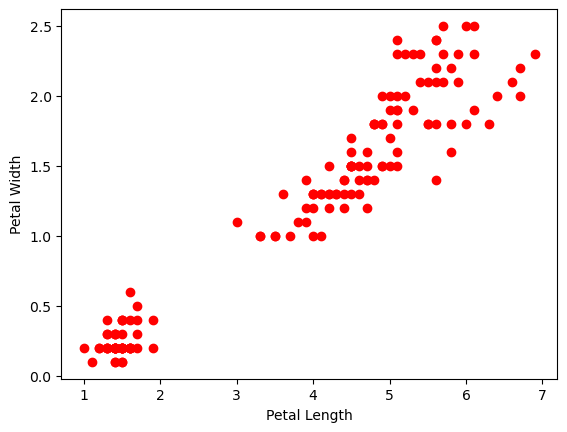

In [14]:
plt.scatter(x="petal_length", y="petal_width", c="r", data=iris)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

## Dodawanie koloru do wykresu
W przykładzie powyżej ustawiliśmy czerwony kolor punktów podając `c="r"`. Możliwe jest także podanie wektora zawierającego kolor każdego punktu.

Text(0, 0.5, 'Petal Width')

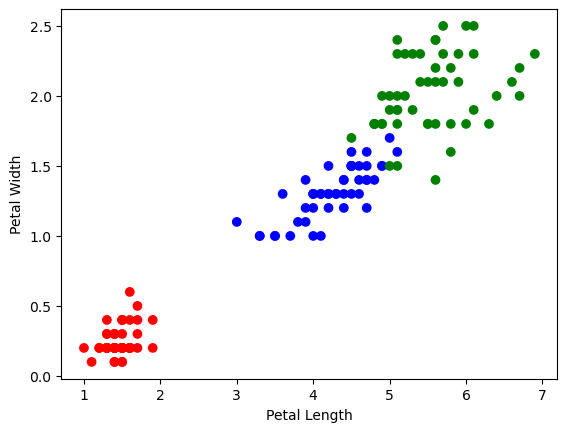

In [15]:
color = iris.variety.map({"Setosa": "r", "Versicolor": "b", "Virginica": "g"})

plt.scatter(x="petal_length", y="petal_width", c=color, data=iris)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

Alternatywną metodą jest podanie kodów 0, 1, 2, ..., które zostaną automatycznie mapowane na kolory. Takie kody można wygenerować np. metodą `factorize()`. Opcjonalnie można podać mapę kolorów `cmap` ([więcej o mapach kolorów](https://matplotlib.org/stable/tutorials/colors/colormaps.html)).

In [18]:
iris.variety.factorize()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64),
 Index(['Setosa', 'Versicolor', 'Virginica'], dtype='object'))

Text(0, 0.5, 'Petal Width')

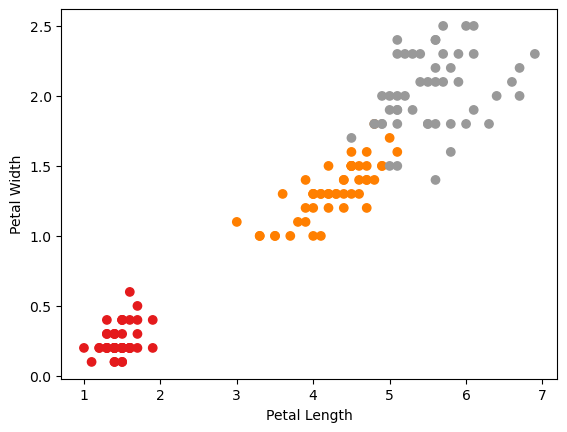

In [19]:
codes, uniques = iris.variety.factorize()
plt.scatter(x="petal_length", y="petal_width", c=codes, cmap='Set1', data=iris)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

Mapowanie kolumny kategorycznej na kolor jest dużo prostsze w Seaborn:

Text(0, 0.5, 'Petal Width')

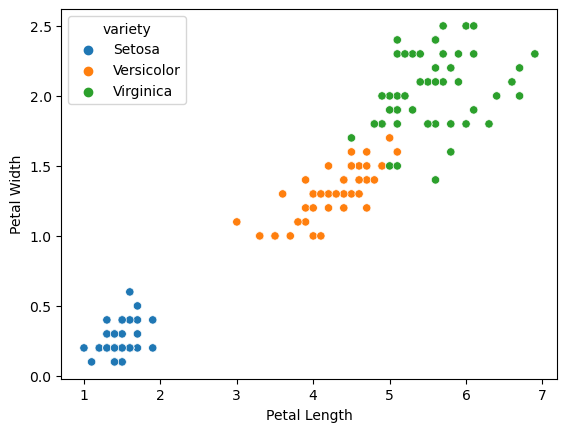

In [20]:
import seaborn as sns
sns.scatterplot(x="petal_length", y="petal_width", hue="variety", data=iris)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

Działa to też np. w `sns.boxplot()` (dane trzeba przedtem wstępnie przekształcić w format 'długi').

<Axes: xlabel='Measurement', ylabel='Value'>

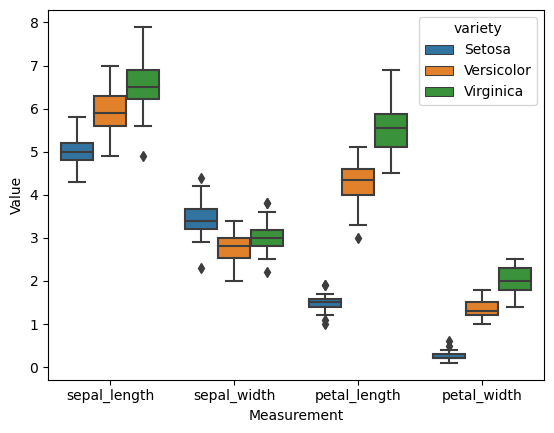

In [21]:
iris_long = iris.melt(id_vars="variety", 
                      value_vars=iris.columns[:-1], 
                      var_name="Measurement", 
                      value_name="Value")
sns.boxplot(x=iris_long.Measurement, 
            y=iris_long.Value, 
            hue=iris_long.variety, 
            orient='v')

## `subplots()`
Aby tworzyć wiele wykresów na jednej figurze wykorzystujemy metodę `plt.subplots()` podając jako argumenty liczbę wierszy i kolumn. Metoda zwraca obiekt `Figure` i `np.array` zawierający odpowiednie osie (`Axes`), na których możemy tworzyć wykresy tymi samymi metodami, które są dostępne bezpośrednio w `plt`. Często metoda `subplots()` jest przydatna nawet jeśli tworzymy tylko jeden wykres, ponieważ daje kontrolę nad parametrami figury (możemy np. ustawić jej rozmiar).

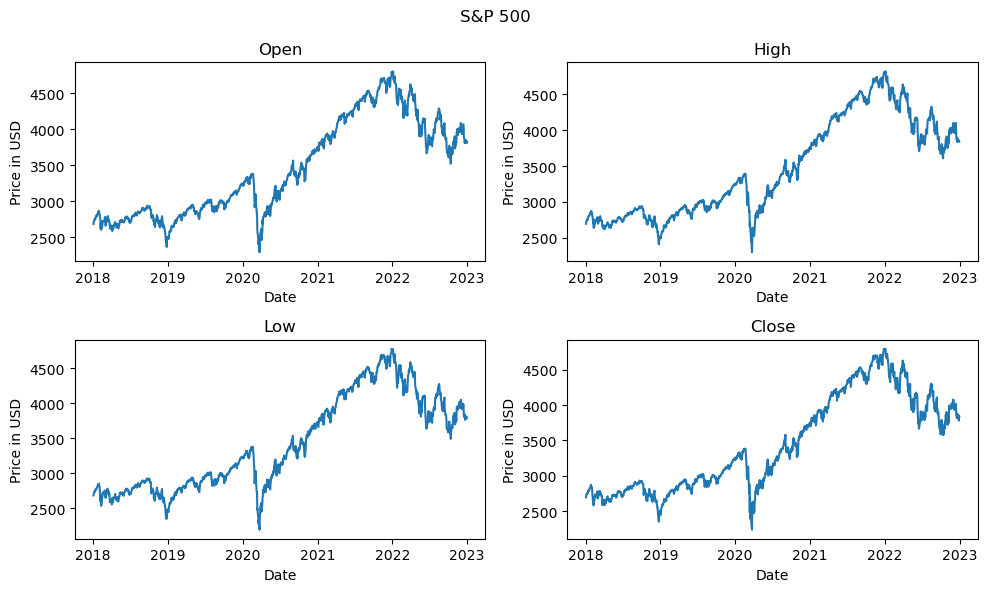

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6)) # Rozmiar w calach

for col, ax in zip(df.columns[:4], axes.ravel()):
    ax.plot(df.index, df[col])
    ax.set_title(col)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price in USD")

fig.suptitle("S&P 500")
fig.tight_layout() # Zapewnia miejsce na tytuły wykresów

## `pairplot()`
Bardzo przydatnym narzędziem we wstępnej eksploracji danych są wykresy par zmiennych, tzw. *pairplot* lub *scatter matrix*. 

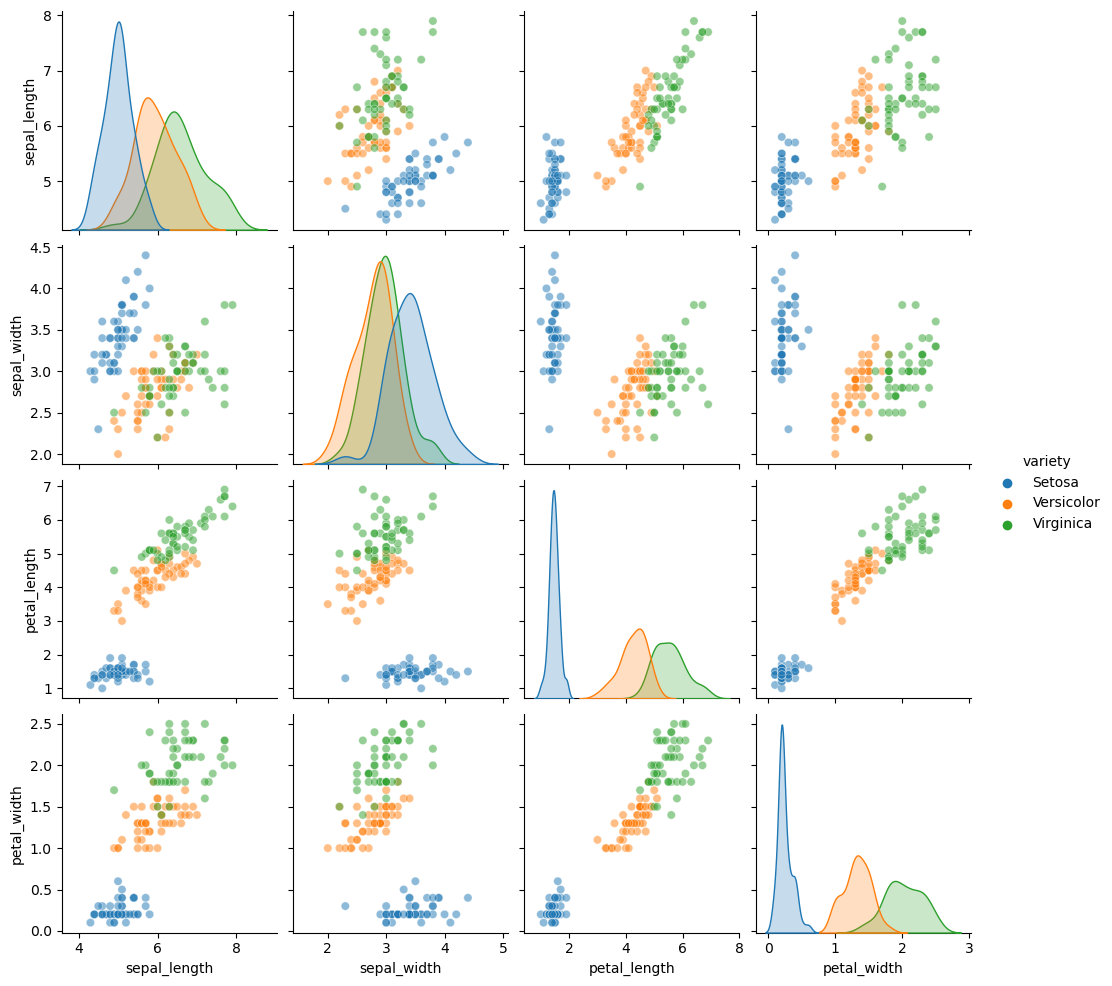

In [25]:
sns.pairplot(data=iris, hue="variety", plot_kws={'alpha': 0.5});

W niektóych przypadkach, np. kiedy mamy bardzo wiele zmiennych, wygodniej jest zwizualizować macierz korelacji. Nadaje się do tego wykres `heatmap`.

Text(0.5, 1.0, 'Correlation Matrix')

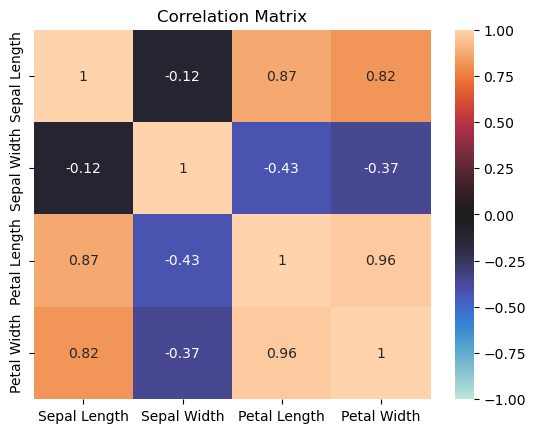

In [26]:
tick_labels = iris_numeric.columns.str.replace("_", " ").str.title()
sns.heatmap(data=iris.corr(numeric_only=True), 
            vmin=-1, 
            vmax=1, 
            annot=True, 
            center=0, 
            xticklabels=tick_labels, 
            yticklabels=tick_labels)
plt.title("Correlation Matrix")

## Zadania

1. Wczytaj plik `SP500.csv`, a następnie:
    - Stwórz histogram dziennych obrotów (`Volume`). Wybierz odpowiednią liczbę koszyków parametrem `bins`. Sprawdź w [dokumentacji `hist()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html), jak stworzyć histogram gęstości.
    - Rozkład dziennych obrotów wizualizuj także za pomocą wykresu pudełkowego.
    - Wskazówka: bardziej czytelne będą wykresy dla dziennych obrotów w mln szt. (`Volume / 10e6`). W przypadku skalowania danych, pamiętaj o zaznaczeniu tego na wykresie (np. w opisie osi).

2. Wczytaj plik `waw_weather_monthly.csv`, a następnie:
    - Stwórz wykres słupkowy (`plt.bar()`) przedstawiający amplitudę średnich temperatur w każdym miesiącu (Tmax - Tmin).
    - Stwórz podobny wykres, tak aby podstawą słupków była temperatura minimalna (sprawdź w [dokumentacji](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html), jak to zrobić). Ustaw odpowiedni zakres osi y (`plt.ylim()`)
    - Pamiętaj o dodaniu odpowiednich opisów osi i tytułów. Aby nazwy miesięcy były czytelne, należy je obrócić (np. `plt.xticks(rotation=90)`).
    - Opcjonalnie: Dodaj anotacje (`plt.annotate()`) z minimalną i maksymalną wartością temperatury pod i nad każdym słupkiem.

3. Wczytaj plik `world_bank_co2.csv`, a następnie:
    - Stwórz wykres punktowy pokazujący zależność między `GDP/capita, PPP` a `CO2/capita` za pomocą `plt.scatter()`.
    - Stwórz podobny wykres za pomocą `sns.scatterplot()`, tak aby kolory punktów (`hue`) odpowiadały regionom, a rozmiary (`size`) populacji (w mln).
    - Wskazówka: często wykresy punktowe są czytelniejsze po odpowiednim dobraniu parametru `alpha`.

4. Użyj `subplots()` aby manualnie stworzyć wykres par dla danych `iris` podobny do tego z przykładu powyżej. Podanie parametrów `sharex`, `sharey` pozwala współdzielić osie wykresów. Dodaj opisy do osi zewnętrznych wykresów (metodą `ax.set_title()`). Nie jest wymagane rysowanie histogramów na przekątnej. W przypadku dużego zagęszczenia punktów na wykresie warto zmniejszyć parametr `alpha`.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# readind SP500.csv
df = pd.read_csv("SP500.csv", parse_dates=True, index_col="Date")

In [2]:
df.describe()

,Open,High,Low,Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,3449.673415,3470.866060,3426.301168,3449.724766,2.286974e+09
std,668.795604,672.278346,665.154072,668.903627,5.922350e+08
min,2290.710000,2300.730000,2191.860000,2237.400000,7.203000e+08
25%,2842.390000,2857.675000,2825.450000,2844.115000,1.902161e+09
50%,3280.610000,3288.130000,3253.220000,3276.020000,2.149094e+09
75%,4038.645000,4077.880000,3995.845000,4028.935000,2.515425e+09
max,4804.510000,4818.620000,4780.040000,4796.560000,5.061430e+09


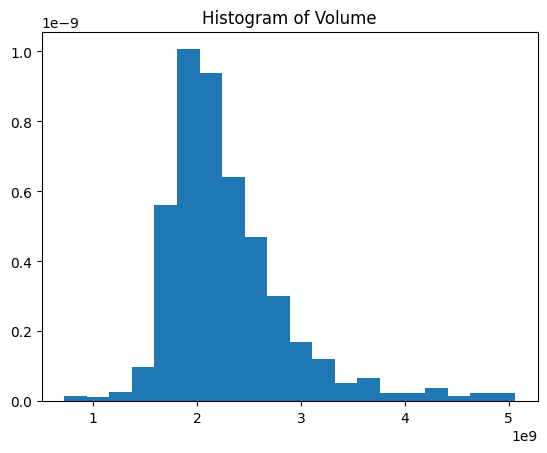

In [3]:
# density=True for probability density, stacked for normalization to 1
plt.hist(df.Volume, bins=20, density=True, stacked=True)
plt.title("Histogram of Volume");

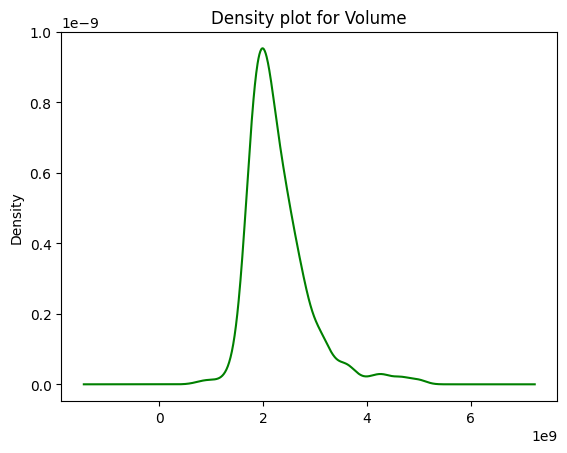

In [4]:
df.Volume.plot.density(color='green') 
plt.title('Density plot for Volume') 
plt.show()

In [5]:

df['Volume'] = df['Volume'] / 1e+06
renamed = df.rename(columns={'Volume': 'Volume/1e+06'})

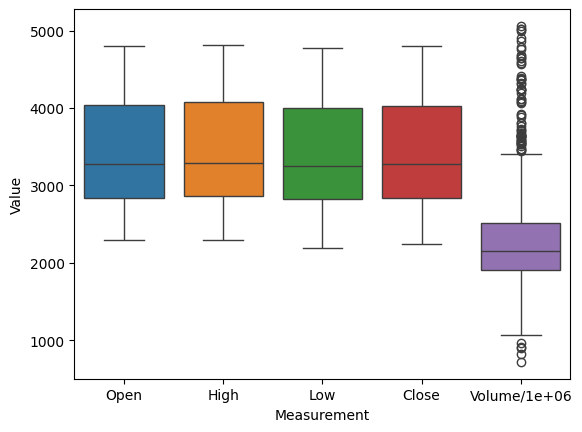

In [6]:
import seaborn as sns
df_long = renamed.melt(value_vars=renamed.columns, var_name="Measurement", value_name="Value")
# boxplot of daily values
sns.boxplot(x=df_long.Measurement,
            y=df_long.Value, 
            hue=df_long.Measurement, 
            orient='v');

In [7]:
df = pd.read_csv("waw_weather_monthly.csv", index_col="time")

2. Wczytaj plik `waw_weather_monthly.csv`, a następnie:
    - Stwórz wykres słupkowy (`plt.bar()`) przedstawiający amplitudę średnich temperatur w każdym miesiącu (Tmax - Tmin).
    - Stwórz podobny wykres, tak aby podstawą słupków była temperatura minimalna (sprawdź w [dokumentacji](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html), jak to zrobić). Ustaw odpowiedni zakres osi y (`plt.ylim()`)
    - Pamiętaj o dodaniu odpowiednich opisów osi i tytułów. Aby nazwy miesięcy były czytelne, należy je obrócić (np. `plt.xticks(rotation=90)`).
    - Opcjonalnie: Dodaj anotacje (`plt.annotate()`) z minimalną i maksymalną wartością temperatury pod i nad każdym słupkiem.

In [8]:
df

,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum,windspeed_10m_max
time,,,,,,
January,2.53,-1.46,-2.08,-6.49,2.17,22.97
February,5.79,0.23,1.25,-4.45,2.26,23.91
March,7.36,-1.94,3.36,-6.14,0.14,14.35
April,10.39,2.35,6.97,-1.38,2.12,16.93
May,18.42,8.79,16.03,5.85,2.17,19.57
June,24.17,14.23,23.91,13.46,1.76,15.53
July,23.92,15.19,23.31,14.35,3.36,16.80
August,25.84,16.91,26.56,17.26,1.45,13.32
September,16.46,9.04,14.19,6.83,1.61,15.45


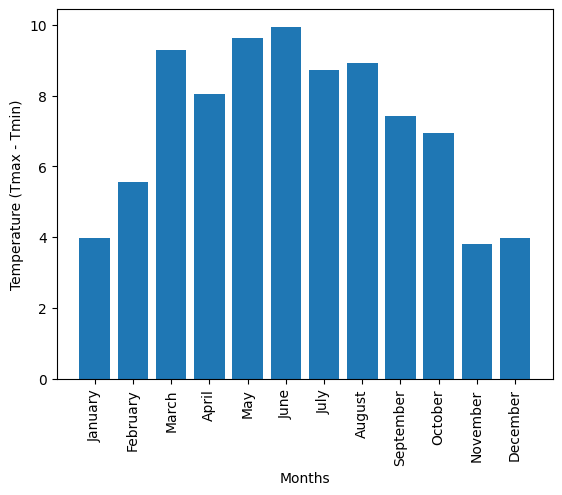

In [9]:
# Stwórz wykres słupkowy (`plt.bar()`) przedstawiający amplitudę średnich temperatur w każdym miesiącu (Tmax - Tmin)
plt.xticks(rotation = 90)
plt.bar(df.index, df.temperature_2m_max - df.temperature_2m_min)
plt.xlabel('Months')
plt.ylabel('Temperature (Tmax - Tmin)')
plt.show()

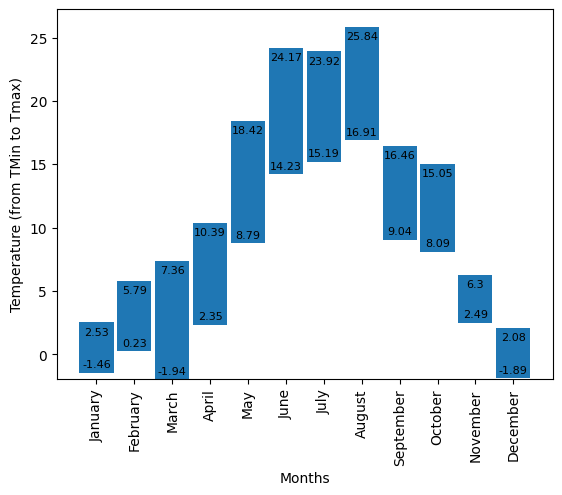

In [12]:
# Stwórz podobny wykres, tak aby podstawą słupków była temperatura minimalna 
# (sprawdź w [dokumentacji](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html), jak to zrobić). Ustaw odpowiedni zakres osi y (`plt.ylim()`)
plt.bar(df.index, df.temperature_2m_max - df.temperature_2m_min, bottom=df.temperature_2m_min, width=0.9)
# y_min = df['temperature_2m_min'].min()
# plt.ylim(bottom=y_min)
plt.xticks(rotation = 90)
plt.xlabel('Months')
plt.ylabel('Temperature (from TMin to Tmax)')
for index, row in df.iterrows():
    t_max = row['temperature_2m_max']
    t_min = row['temperature_2m_min']
    plt.annotate(text=t_max,
                 size=8,
                 xy=(index, t_max-1), 
                 horizontalalignment='center')
    plt.annotate(text=t_min,
                 size=8,
                 xy=(index, t_min+0.4), 
                 horizontalalignment='center')
plt.show()

3. Wczytaj plik `world_bank_co2.csv`, a następnie:
    - Stwórz wykres punktowy pokazujący zależność między `GDP/capita, PPP` a `CO2/capita` za pomocą `plt.scatter()`.
    - Stwórz podobny wykres za pomocą `sns.scatterplot()`, tak aby kolory punktów (`hue`) odpowiadały regionom, a rozmiary (`size`) populacji (w mln).
    - Wskazówka: często wykresy punktowe są czytelniejsze po odpowiednim dobraniu parametru `alpha`.

In [13]:
wb = pd.read_csv('world_bank_co2.csv')

In [17]:
wb.sort_values(by='CO2/capita')

,Country Name,Country Code,Region,Population,CO2/capita,"GDP/capita, PPP"
34,"Congo, Dem. Rep.",COD,Africa,89906890.0,0.035704,1104.624423
149,Somalia,SOM,Africa,15981300.0,0.043175,1186.326829
27,Central African Republic,CAF,Africa,5209324.0,0.046071,898.137303
10,Burundi,BDI,Africa,11874838.0,0.060632,760.453399
117,Malawi,MWI,Africa,18867337.0,0.076852,1581.757210
...,...,...,...,...,...,...
128,Oman,OMN,Asia,4602768.0,16.518321,35241.222343
3,United Arab Emirates,ARE,Asia,9211657.0,20.502283,74811.690215
91,Kuwait,KWT,Asia,4441100.0,20.861949,49311.698465
16,Bahrain,BHR,Asia,1494188.0,22.259581,51869.455454


In [18]:
wb.sort_values(by='GDP/capita, PPP')

,Country Name,Country Code,Region,Population,CO2/capita,"GDP/capita, PPP"
10,Burundi,BDI,Africa,11874838.0,0.060632,760.453399
27,Central African Republic,CAF,Africa,5209324.0,0.046071,898.137303
34,"Congo, Dem. Rep.",COD,Africa,89906890.0,0.035704,1104.624423
149,Somalia,SOM,Africa,15981300.0,0.043175,1186.326829
120,Niger,NER,Africa,23443393.0,0.091710,1268.827795
...,...,...,...,...,...,...
3,United Arab Emirates,ARE,Asia,9211657.0,20.502283,74811.690215
75,Ireland,IRL,Europe,4934340.0,7.245143,89670.865574
138,Qatar,QAT,Asia,2807235.0,32.761775,94674.312143
145,Singapore,SGP,Asia,5703569.0,8.307079,102431.315673


Text(0, 0.5, 'CO2/capita')

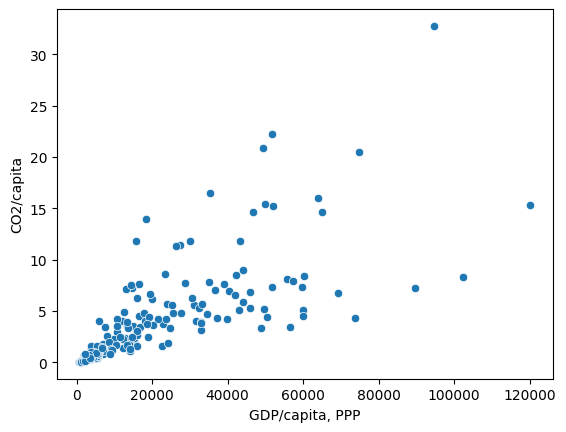

In [19]:
sns.scatterplot(x="GDP/capita, PPP", y="CO2/capita", data=wb)
plt.xlabel("GDP/capita, PPP")
plt.ylabel("CO2/capita")

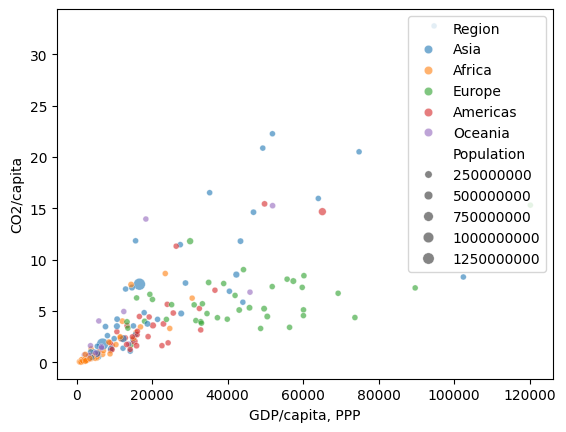

In [29]:
sns.scatterplot(x="GDP/capita, PPP", y="CO2/capita", hue="Region", size='Population', alpha = 0.6, data=wb)
plt.xlabel("GDP/capita, PPP")
plt.ylabel("CO2/capita");

4. Użyj `subplots()` aby manualnie stworzyć wykres par dla danych `iris` podobny do tego z przykładu powyżej. Podanie parametrów `sharex`, `sharey` pozwala współdzielić osie wykresów. Dodaj opisy do osi zewnętrznych wykresów (metodą `ax.set_title()`). Nie jest wymagane rysowanie histogramów na przekątnej. W przypadku dużego zagęszczenia punktów na wykresie warto zmniejszyć parametr `alpha`.

In [30]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


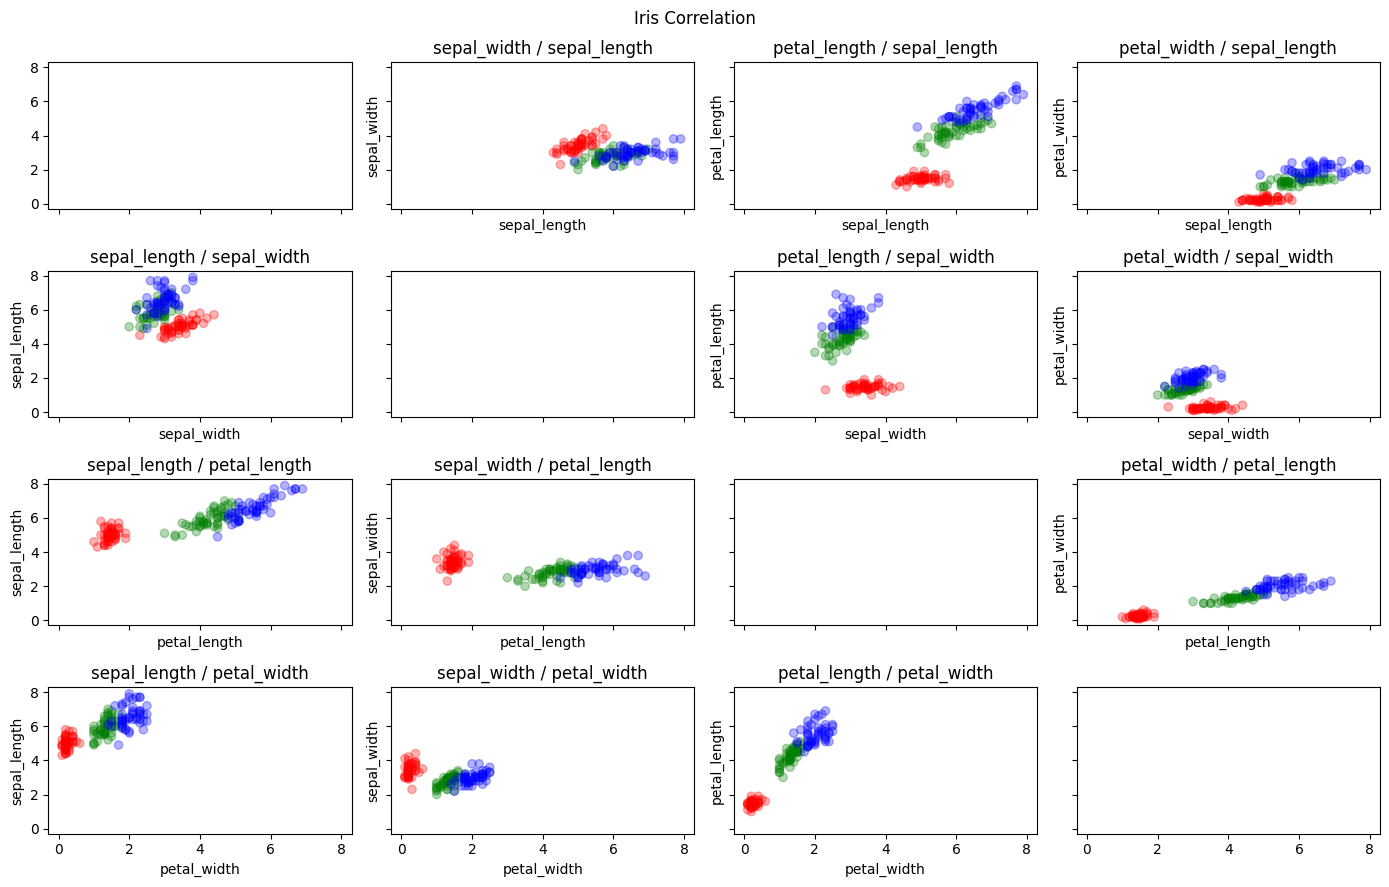

In [77]:
fig, axes = plt.subplots(4, 4, figsize=(14, 9), sharex=True, sharey=True) # Rozmiar w calach
cols = iris.columns[:-1]
length = len(cols)
colors = {'Setosa':'red', 'Versicolor':'green', 'Virginica':'blue'}
color = iris['variety'].map(colors)
for x in range(length):
    for y in range(length):
        if x == y: continue
        ax = axes[x][y]
        x_col = iris.columns[x]
        y_col = iris.columns[y] 
        ax.scatter(iris[x_col], iris[y_col], c=color, alpha=0.3)
        ax.set_title(f'{y_col} / {x_col}')
        ax.set_xlabel(x_col)
        ax.set_ylabel(y_col) 
fig.suptitle("Iris Correlation")
fig.tight_layout() # Zapewnia miejsce na tytuły wykresów